## 資料合併與連結
#### 使用Python執行將HR.xlsx、INTERVIEW.xlsx兩個資料表合併得出數據，試著與下方SQL語法執行後的結果相同。

'''  
SELECT *  
FROM [dbo].[求職者] AS C left outer JOIN  
[dbo].[面試紀錄] AS I  
ON C.身分證 = I.身分證  
WHERE I.身分證 is not null  
ORDER BY I.身分證  
'''

In [ ]:
# Windows
! dir *.xlsx

In [1]:
# Mac
! ls *.xlsx

HR.xlsx        INTERVIEW.xlsx


In [2]:
import pandas as pd

HR = pd.read_excel('HR.xlsx')
INTERVIEW = pd.read_excel('INTERVIEW.xlsx')

In [3]:
HR[:3]

,姓名,身分證,專長,學歷,經驗,可用
0,tom,a123456789,SQL,PHD,99.0,1
1,ken,b112234567,JAVA,BA,4.0,0
2,lewis,C123456789,PHP,Master,NaN,0


In [4]:
INTERVIEW[:3]

,面試序號,公司統編,身分證,面試時間,面試結果,最後薪資
0,20110225001,12345678,a123456789,2011-02-25,0,26000
1,20110225002,11132456,f234567891,2011-02-25,1,50000
2,20110225003,12345678,f234567891,2011-02-25,-1,0


In [5]:
# pd.merge()：可作為DataFrame之間的連結方式；參數on：用於連接Column索引名稱。

pd.merge(left = HR, right = INTERVIEW, how = 'inner', on = '身分證')

,姓名,身分證,專長,學歷,經驗,可用,面試序號,公司統編,面試時間,面試結果,最後薪資
0,tom,a123456789,SQL,PHD,99.0,1,20110225001,12345678,2011-02-25,0,26000
1,tom,a123456789,SQL,PHD,99.0,1,20110226001,11132456,2011-02-26,1,55000
2,tom,a123456789,SQL,PHD,99.0,1,20110227001,65487153,2011-02-27,1,22000
3,ken,b112234567,JAVA,BA,4.0,0,20110227002,12345678,2011-02-27,-1,0
4,ken,b112234567,JAVA,BA,4.0,0,20110227003,11132456,2011-02-27,0,48000
5,jean,f234567891,MYSQL,Master,2.0,1,20110225002,11132456,2011-02-25,1,50000
6,jean,f234567891,MYSQL,Master,2.0,1,20110225003,12345678,2011-02-25,-1,0
7,jean,f234567891,MYSQL,Master,2.0,1,20110226002,65487153,2011-02-26,0,23000


In [6]:
pd.merge(left = HR, right = INTERVIEW, how = 'left', on = '身分證')
# left -- SQL Server . left outer join
# right - SQL Server . right outer join
# outer - SQL Server . full outer join

,姓名,身分證,專長,學歷,經驗,可用,面試序號,公司統編,面試時間,面試結果,最後薪資
0,tom,a123456789,SQL,PHD,99.0,1,2.011023e+10,12345678.0,2011-02-25,0.0,26000.0
1,tom,a123456789,SQL,PHD,99.0,1,2.011023e+10,11132456.0,2011-02-26,1.0,55000.0
2,tom,a123456789,SQL,PHD,99.0,1,2.011023e+10,65487153.0,2011-02-27,1.0,22000.0
3,ken,b112234567,JAVA,BA,4.0,0,2.011023e+10,12345678.0,2011-02-27,-1.0,0.0
4,ken,b112234567,JAVA,BA,4.0,0,2.011023e+10,11132456.0,2011-02-27,0.0,48000.0
5,lewis,C123456789,PHP,Master,NaN,0,NaN,NaN,NaT,NaN,NaN
6,ada,D123456789,SQL,Master,6.0,0,NaN,NaN,NaT,NaN,NaN
7,Julia,E123456789,SQL,Master,4.0,0,NaN,NaN,NaT,NaN,NaN
8,jean,f234567891,MYSQL,Master,2.0,1,2.011023e+10,11132456.0,2011-02-25,1.0,50000.0
9,jean,f234567891,MYSQL,Master,2.0,1,2.011023e+10,12345678.0,2011-02-25,-1.0,0.0


## Practice：資料合併的原始資料
import pandas as pd  
left_course = pd.DataFrame({'id':[1,2,3,4,5],  
                            'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],  
                            'subject_id':['sub1','sub2','sub4','sub6','sub5']})  
right_course = pd.DataFrame({'id':[1,2,3,4,5],  
                             'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],  
                             'subject_id':['sub2','sub4','sub3','sub6','sub5']})  
print(left_course)  
print('---------')  
print(right_course)

In [2]:
# 印出left_course

import pandas as pd

left_course = pd.DataFrame({ 'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right_course = pd.DataFrame({'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
left_course

,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayoung,sub5


In [3]:
# 印出right_course

import pandas as pd
left_course = pd.DataFrame({ 'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right_course = pd.DataFrame({'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
right_course

,id,Name,subject_id
0,1,Billy,sub2
1,2,Brian,sub4
2,3,Bran,sub3
3,4,Bryce,sub6
4,5,Betty,sub5


In [4]:
# 依照id將left_course和right_course串接兩個資料集

pd.merge(left = left_course, right = right_course, on='id')

,id,Name_x,subject_id_x,Name_y,subject_id_y
0,1,Alex,sub1,Billy,sub2
1,2,Amy,sub2,Brian,sub4
2,3,Allen,sub4,Bran,sub3
3,4,Alice,sub6,Bryce,sub6
4,5,Ayoung,sub5,Betty,sub5


In [5]:
# 利用id和subject_id串接兩個資料集

pd.merge(left = left_course, right = right_course, on = ['id', 'subject_id'])

,id,Name_x,subject_id,Name_y
0,4,Alice,sub6,Bryce
1,5,Ayoung,sub5,Betty


In [6]:
# 從左邊顯示所有左邊的subject_id，對應至右邊，沒有對應到就顯示NaN

pd.merge(left = left_course, right = right_course, on = 'subject_id', how = 'left')

,id_x,Name_x,subject_id,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,5.0,Betty


In [7]:
# outer：並集。左右兩邊都納入

pd.merge(left = left_course, right = right_course, how = 'outer', on = 'subject_id')

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,3.0,Allen,sub4,2.0,Brian
3,4.0,Alice,sub6,4.0,Bryce
4,5.0,Ayoung,sub5,5.0,Betty
5,NaN,NaN,sub3,3.0,Bran


In [8]:
# 承上，以subject_id排序

pd.merge(left = left_course, right = right_course,
         how = 'outer', on = 'subject_id').sort_values(by = 'subject_id')

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
5,NaN,NaN,sub3,3.0,Bran
2,3.0,Allen,sub4,2.0,Brian
4,5.0,Ayoung,sub5,5.0,Betty
3,4.0,Alice,sub6,4.0,Bryce


In [9]:
# inner：交集。兩邊都有才納入

pd.merge(left = left_course, right = right_course, how = 'inner', on = 'subject_id')

,id_x,Name_x,subject_id,id_y,Name_y
0,2,Amy,sub2,1,Billy
1,3,Allen,sub4,2,Brian
2,4,Alice,sub6,4,Bryce
3,5,Ayoung,sub5,5,Betty


## Practice：資料合併的欄位名稱不同
import pandas as pd  
left_course = pd.DataFrame(  
         {'id':[1, 2, 3, 4, 5],    
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],  
         'subject1':['sub1', 'sub2', 'sub4', 'sub6', 'sub5']})  
right_course = pd.DataFrame(  
         {'id':[1, 2, 3, 4, 5],  
         'Name':['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],  
         'subject2':['sub2', 'sub4', 'sub3', 'sub6', 'sub5']})  
pd.merge(left = left_course, right = right_course,  
         how = 'inner', left_on = 'subject1',  
         right_on = 'subject2')

In [10]:
import pandas as pd

left_course = pd.DataFrame(
         {'id':[1, 2, 3, 4, 5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject1':['sub1', 'sub2', 'sub4', 'sub6', 'sub5']})
right_course = pd.DataFrame(
         {'id':[1, 2, 3, 4, 5],  
         'Name':['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject2':['sub2', 'sub4', 'sub3', 'sub6', 'sub5']})
pd.merge(left = left_course, right = right_course,
         how = 'inner', left_on = 'subject1',
         right_on = 'subject2')

,id_x,Name_x,subject1,id_y,Name_y,subject2
0,2,Amy,sub2,1,Billy,sub2
1,3,Allen,sub4,2,Brian,sub4
2,4,Alice,sub6,4,Bryce,sub6
3,5,Ayoung,sub5,5,Betty,sub5


#### 使用Python語法操作出與下方SQL Server語法相同的結果
'''  
SELECT *  
FROM [dbo].[求職者]  
WHERE [姓名] IN ('tom', 'ken', 'lewis', 'ada')  

UNION ALL  

SELECT *  
FROM [dbo].[求職者]  
WHERE [姓名] NOT IN ('tom', 'ken', 'lewis', 'ada')  
'''

In [1]:
# pd.merge --> SQL Server join
# pd.concat -> SQL Server union (all)

In [2]:
import pandas as pd

HR = pd.read_excel('HR.xlsx')
HR

,姓名,身分證,專長,學歷,經驗,可用
0,tom,a123456789,SQL,PHD,99.0,1
1,ken,b112234567,JAVA,BA,4.0,0
2,lewis,C123456789,PHP,Master,NaN,0
3,ada,D123456789,SQL,Master,6.0,0
4,Julia,E123456789,SQL,Master,4.0,0
5,jean,f234567891,MYSQL,Master,2.0,1
6,James,Q123456789,Coding,MASTER,10.0,1
7,jim,X123456789,SQL,Master,5.0,0
8,annie,Y123456789,BI,PHD,10.0,1


In [10]:
# 將HR內的資料表依照姓名分出HR_1、HR_2

HR_1 = HR[HR['姓名'].isin(['tom', 'ken', 'lewis', 'ada'])]
HR_2 = HR[~HR['姓名'].isin(['tom', 'ken', 'lewis', 'ada'])]
HR_1

,姓名,身分證,專長,學歷,經驗,可用
0,tom,a123456789,SQL,PHD,99.0,1
1,ken,b112234567,JAVA,BA,4.0,0
2,lewis,C123456789,PHP,Master,NaN,0
3,ada,D123456789,SQL,Master,6.0,0


In [11]:
# 印出HR_2
HR_2

,姓名,身分證,專長,學歷,經驗,可用
4,Julia,E123456789,SQL,Master,4.0,0
5,jean,f234567891,MYSQL,Master,2.0,1
6,James,Q123456789,Coding,MASTER,10.0,1
7,jim,X123456789,SQL,Master,5.0,0
8,annie,Y123456789,BI,PHD,10.0,1


In [12]:
# pd.concat()：可以將兩個資料的Rows連結。

pd.concat([HR_1, HR_2], axis = 0)

,姓名,身分證,專長,學歷,經驗,可用
0,tom,a123456789,SQL,PHD,99.0,1
1,ken,b112234567,JAVA,BA,4.0,0
2,lewis,C123456789,PHP,Master,NaN,0
3,ada,D123456789,SQL,Master,6.0,0
4,Julia,E123456789,SQL,Master,4.0,0
5,jean,f234567891,MYSQL,Master,2.0,1
6,James,Q123456789,Coding,MASTER,10.0,1
7,jim,X123456789,SQL,Master,5.0,0
8,annie,Y123456789,BI,PHD,10.0,1


## Practice：資料連結的原始資料
import pandas as pd  
one = pd.DataFrame({'Name':['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],  
         'subject_id':['sub1', 'sub2', 'sub4', 'sub6', 'sub5'],  
         'Marks_scored':[98, 90, 87, 69, 78]},  
         index = [1, 2, 3, 4, 5])  
two = pd.DataFrame({'Name':['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],  
         'subject_id':['sub2', 'sub4', 'sub3', 'sub6', 'sub5'],  
         'Marks_scored':[89, 80, 79, 97, 88]},  
         index = [1, 2, 3, 4, 5])  
two

In [13]:
# 印出one的資料

import pandas as pd

one = pd.DataFrame({'Name':['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
                    'subject_id':['sub1', 'sub2', 'sub3', 'sub4', 'sub5'],
                   'Marks_scored':[98, 90, 87, 69, 78]},
                   index = [1, 2, 3, 4, 5])
two = pd.DataFrame({'Name':['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
                    'subject_id':['sub1', 'sub2', 'sub3', 'sub4', 'sub5'],
                   'Marks_scored':[89, 80, 79, 97, 88]},
                   index = [1, 2, 3, 4, 5])
one

,Name,subject_id,Marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub3,87
4,Alice,sub4,69
5,Ayoung,sub5,78


In [14]:
# 印出two的資料

two

,Name,subject_id,Marks_scored
1,Billy,sub1,89
2,Brian,sub2,80
3,Bran,sub3,79
4,Bryce,sub4,97
5,Betty,sub5,88


In [15]:
# 上下合併one和two的資料

pd.concat([one, two])

,Name,subject_id,Marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub3,87
4,Alice,sub4,69
5,Ayoung,sub5,78
1,Billy,sub1,89
2,Brian,sub2,80
3,Bran,sub3,79
4,Bryce,sub4,97
5,Betty,sub5,88


In [16]:
# keys參數為自訂最外層索引（hierarchical index）

pd.concat([one, two], keys = ['one-x','two-y'])

Name subject_id  Marks_scored
one-x 1    Alex       sub1            98
      2     Amy       sub2            90
      3   Allen       sub3            87
      4   Alice       sub4            69
      5  Ayoung       sub5            78
two-y 1   Billy       sub1            89
      2   Brian       sub2            80
      3    Bran       sub3            79
      4   Bryce       sub4            97
      5   Betty       sub5            88

In [17]:
# 上下合併，索引重新排序

pd.concat([one, two], ignore_index = True)

,Name,subject_id,Marks_scored
0,Alex,sub1,98
1,Amy,sub2,90
2,Allen,sub3,87
3,Alice,sub4,69
4,Ayoung,sub5,78
5,Billy,sub1,89
6,Brian,sub2,80
7,Bran,sub3,79
8,Bryce,sub4,97
9,Betty,sub5,88


In [18]:
# 左右合併（建議使用pd.merge）

pd.concat([one, two], axis = 1)

,Name,subject_id,Marks_scored,Name,subject_id,Marks_scored
1,Alex,sub1,98,Billy,sub1,89
2,Amy,sub2,90,Brian,sub2,80
3,Allen,sub3,87,Bran,sub3,79
4,Alice,sub4,69,Bryce,sub4,97
5,Ayoung,sub5,78,Betty,sub5,88


## 轉換與過濾
#### Practice：選組與聚合
import pandas as pd  
pl_data = {'Team':['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders', 'LuLu'],  
         'Rank':[1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2, 4],  
         'Year':[2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017, 2018],  
         'Points':[876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690, 700]}  
df = pd.DataFrame(pl_data)

In [19]:
import pandas as pd

pl_data = {'Team':['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders', 'LuLu'],
         'Rank':[1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2, 4],
         'Year':[2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017, 2018],
         'Points':[876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690, 700]}
df = pd.DataFrame(pl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [29]:
# 印出2017年份的資料

grouped = df.groupby('Year')
grouped.get_group(2017)

,Team,Rank,Year,Points
7,Kings,1,2017,788
11,Riders,2,2017,690


In [30]:
# 依照Points欄位印出每年平均值

import numpy as np
grouped['Points'].agg(np.mean)

Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
2018    700.00
Name: Points, dtype: float64

In [31]:
# 依照Team欄位印出個數

grouped2 = df.groupby('Team')
grouped2.agg(np.size)

,Rank,Year,Points
Team,,,
Devils,2,2,2
Kings,3,3,3
LuLu,1,1,1
Riders,4,4,4
Royals,2,2,2
kings,1,1,1


In [34]:
# 將Points欄位依照每年份印出總和、平均值、標準差

grouped['Points'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Year,,,
2014,3181,795.25,87.439026
2015,3078,769.50,65.035888
2016,1450,725.00,43.840620
2017,1478,739.00,69.296465
2018,700,700.00,NaN


## Practice：轉換與過濾
import numpy as np  
grouped = df1.df.groupby('Team')  
score = lambda x: (x - x.mean( )) / x.std( )*10  
print (grouped.transform(score))  
print (df1.df.groupby('Team').filter(lambda x: len(x) >= 3))

In [35]:
grouped = df.groupby('Year')
for g, d in grouped:
    print(g, '\n', d, '\n')

2014 
      Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701 

2015 
       Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804 

2016 
      Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694 

2017 
       Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690 

2018 
     Team  Rank  Year  Points
12  LuLu     4  2018     700 



In [36]:
# 群組化之後針對每一組數據進行z-score的計算

grouped = df.groupby('Team')
score = lambda x: (x - x.mean( )) / x.std()*10 # z-score * 10
grouped.transform(score)

,Rank,Year,Points
0,-15.000000,-11.618950,12.843272
1,5.000000,-3.872983,3.020286
2,-7.071068,-7.071068,7.071068
3,7.071068,7.071068,-7.071068
4,11.547005,-10.910895,-8.608621
5,NaN,NaN,NaN
6,-5.773503,2.182179,-2.360428
7,-5.773503,8.728716,10.969049
8,5.000000,3.872983,-7.705963
9,7.071068,-7.071068,-7.071068


In [37]:
# 根據Team分組

grouped = df.groupby('Team')
for g, d in grouped:
        print(g, '\n', d, '\n')

Devils 
      Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673 

Kings 
     Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788 

LuLu 
     Team  Rank  Year  Points
12  LuLu     4  2018     700 

Riders 
       Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690 

Royals 
       Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804 

kings 
     Team  Rank  Year  Points
5  kings     4  2015     812 



In [39]:
# 根據Team分組，印出每一組當中有超過三人的

grouped = df.groupby('Team')
for g, d in grouped:
    if d.shape[0]>=3:
        print(g, '\n', d, '\n', len(d))

Kings 
     Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788 
 3
Riders 
       Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690 
 4


In [38]:
# 根據Team分組，印出每一組當中有超過三人的

df.groupby('Team').filter(lambda x: len(x) >= 3).sort_values(by = 'Team')

,Team,Rank,Year,Points
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


In [40]:
# 根據Team分組，印出每一組當中有超過三人的
df.groupby('Team').filter(lambda x: x.shape[0] >= 3).sort_values(by = 'Team')

,Team,Rank,Year,Points
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


#### groupby.apply與groupby.transform

In [61]:
import pandas as pd

pl_data = {'Team':['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders', 'LuLu'],
         'Rank':[1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2, 4],
         'Year':[2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017, 2018],
         'Points':[876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690, 700]}
df = pd.DataFrame(pl_data)
df = df[df['Team'].isin(['Riders', 'Devils'])].sort_values(by = 'Team')
df

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


In [ ]:
# numpy的std用“母體”計算 ≠ pandas的std用“樣本”計算

In [62]:
import numpy as np

points = df.Points.values # / (N-1)
df.Points.describe()['std']

91.24344725330508

In [63]:
import numpy as np

points = df.Points.values # / N
points, np.std(points)

(array([863, 673, 876, 789, 694, 690]), 83.29349047527997)

In [64]:
# z-score

import numpy as np
points = df.Points.values
points
(points - np.mean(points)) / df.Points.describe()['std'] * 10

array([10.83182807, -9.99158508, 12.25658792,  2.72165663, -7.69004995,
       -8.12843759])

In [65]:
# 群組化之後，針對每一組數據進行z-score的計算
grouped = df.groupby('Team')                    # 注意這邊是pandas標準差 = /(N-1)
score = lambda x: (x - x.mean( )) / x.std()*10  # z-score * 10
grouped[['Rank', 'Year', 'Points']].apply(score)

,Rank,Year,Points
2,-7.071068,-7.071068,7.071068
3,7.071068,7.071068,-7.071068
0,-15.000000,-11.618950,12.843272
1,5.000000,-3.872983,3.020286
8,5.000000,3.872983,-7.705963
11,5.000000,11.618950,-8.157595


In [66]:
# 群組化之後 針對每一組數據進行z-score的計算
grouped = df.groupby('Team')
score = lambda x: (x - x.mean()) / x.std()*10
grouped.transform(score)

,Rank,Year,Points
2,-7.071068,-7.071068,7.071068
3,7.071068,7.071068,-7.071068
0,-15.000000,-11.618950,12.843272
1,5.000000,-3.872983,3.020286
8,5.000000,3.872983,-7.705963
11,5.000000,11.618950,-8.157595


## 進階圖表功能
#### pandas與圖表

In [2]:
# Practice：進階圖表功能

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(np.random.randn(10, 4),
                  index = pd.date_range('1/1/2018', periods = 10), 
                  columns = list('ABCD'))
df

,A,B,C,D
2018-01-01,-0.146856,0.170503,0.492141,0.687420
2018-01-02,0.409989,0.082720,0.792460,-1.241250
2018-01-03,-1.322422,1.105720,0.495525,1.497608
2018-01-04,1.154729,0.197452,-0.281827,1.595210
2018-01-05,-0.246628,-0.800801,-0.839220,0.580281
2018-01-06,-1.068894,1.058849,0.039414,-0.489698
2018-01-07,-0.435058,1.337126,-0.326307,-0.153401
2018-01-08,1.621563,-0.129296,0.039232,-0.422405
2018-01-09,-0.961339,0.794644,0.035607,1.204233
2018-01-10,1.470751,-1.695983,0.432540,-2.260163


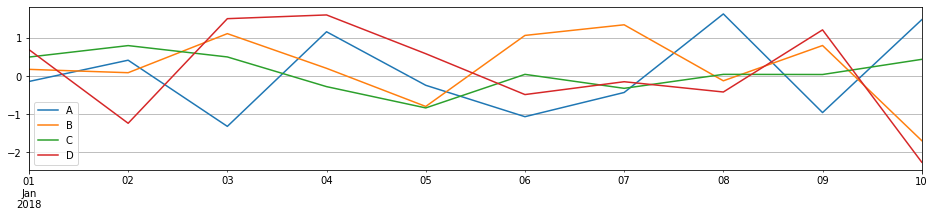

In [3]:
df.plot(figsize = (16, 3))
plt.grid()
plt.show()

In [4]:
# Practice：進階圖表_兩條曲線

import pandas as pd
import matplotlib.pyplot as plt

cities = {"name":["London", "Berlin", "Madrid", "Rome",
                  "Paris", "Vienna", "Bucharest", "Hamburg",
                  "Budapest", "Warsaw", "Barcelona","Munich", "Milan"],
          "population":[8615246, 3562166, 3165235, 2874038,
                        2273305, 1805681, 1803425, 1760433,
                        1754000, 1740119, 1602386, 1493900, 1350680],
          "area":[1572, 891.85, 605.77, 1285,
                  105.4, 414.6, 228, 755, 525.2, 517, 101.9, 310.4, 181.8]
}
city_frame = pd.DataFrame(cities, columns = ["population", "area"], index = cities["name"])
city_frame

,population,area
London,8615246,1572.00
Berlin,3562166,891.85
Madrid,3165235,605.77
Rome,2874038,1285.00
Paris,2273305,105.40
Vienna,1805681,414.60
Bucharest,1803425,228.00
Hamburg,1760433,755.00
Budapest,1754000,525.20
Warsaw,1740119,517.00


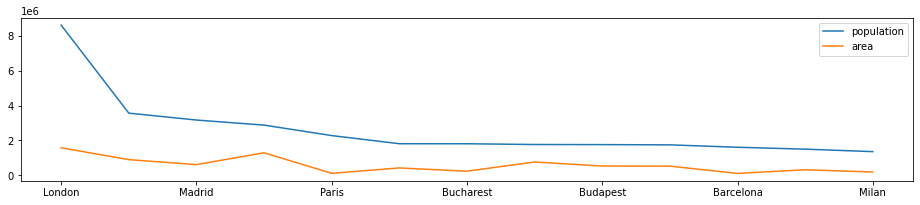

In [5]:
city_frame["area"] = city_frame["area"] * 1000
city_frame.plot(figsize = (16,3))
plt.show( )

#### 子圖表操作

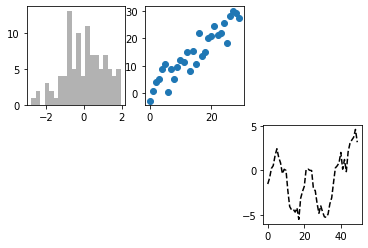

In [6]:
# 補充

fig = plt.figure()
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(236)
ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')
plt.show()

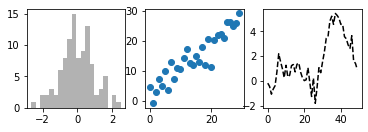

In [8]:
# 補充

fig = plt.figure()
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

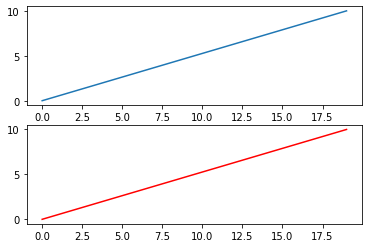

In [9]:
# Practice：子圖表(1)

import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 20.0, 1)
s = np.linspace(0, 10, 20)
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.subplot(2, 1, 2)
plt.plot(t, s, 'r-')
plt.show( )

# 圖：從一開始，先上下再左右

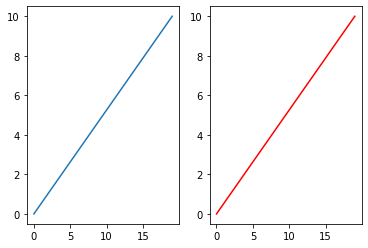

In [11]:
# Practice：子圖表(2)

import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0, 20.0, 1)
s = np.linspace(0, 10, 20)
plt.subplot(1, 2, 1)
plt.plot(t, s)
plt.subplot(1, 2, 2)
plt.plot(t, s, 'r-')
plt.show( )

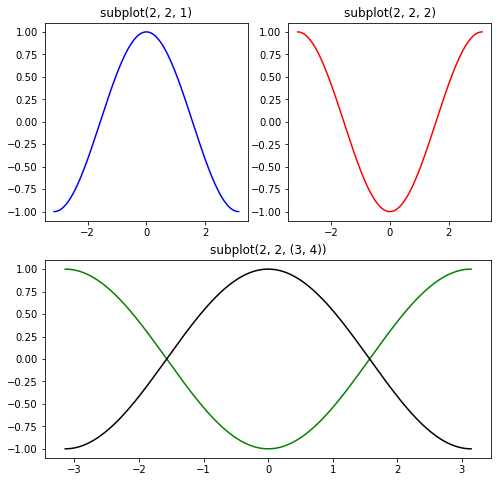

In [12]:
# Practice：子圖表(3)

import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-np.pi, np.pi, 256, endpoint = True)
Y = np.cos(X)
plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1)
plt.plot(X, Y, color = 'blue')
plt.title('subplot(2, 2, 1)')
plt.subplot(2, 2, 2)
plt.plot(X, Y * -1, color = 'red')
plt.title('subplot(2, 2, 2)')
plt.subplot(2, 2, (3, 4)) # 3+4合併
plt.plot(X, Y * -1, color = 'green')
plt.plot(X, Y, color = 'black')
plt.title('subplot(2, 2, (3, 4))')
plt.show( )

## 分析與圖表顯示
#### 查看數值與型態

In [14]:
import pandas as pd

sales = pd.read_csv('salesv2.csv')
sales

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27
...,...,...,...,...,...,...,...,...
995,758133,"Kihn, McClure and Denesik",WJ-02096,Belt,11,60.50,665.50,2014-08-03 10:39:51
996,850140,Kunze Inc,GS-86623,Shoes,16,19.66,314.56,2014-05-03 21:18:15
997,93356,Waters-Walker,GS-86623,Shoes,13,90.95,1182.35,2014-06-14 12:43:51
998,304860,Huel-Haag,LL-46261,Shoes,9,98.22,883.98,2014-07-26 01:10:57


In [15]:
sales.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


In [16]:
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

In [17]:
# dtypes的輸出確保數字資料的格式為浮點數或整數

sales.dtypes

account number      int64
name               object
sku                object
category           object
quantity            int64
unit price        float64
ext price         float64
date               object
dtype: object

#### 分組與Bar顯示

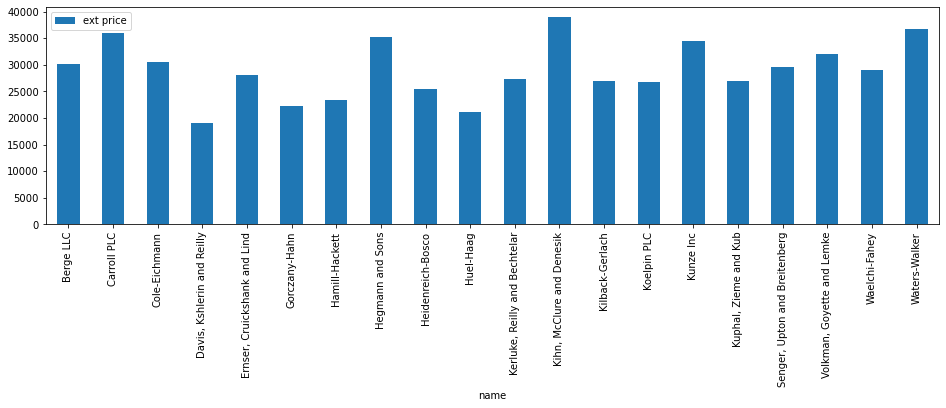

In [18]:
# Practice：分組與Bar顯示

import matplotlib.pyplot as plt

sales_totals = sales[['name', 'ext price', 'date']].groupby('name').sum()
sales_totals
my_plot = sales_totals.plot(kind = 'bar', figsize = (16,4))
plt.show()

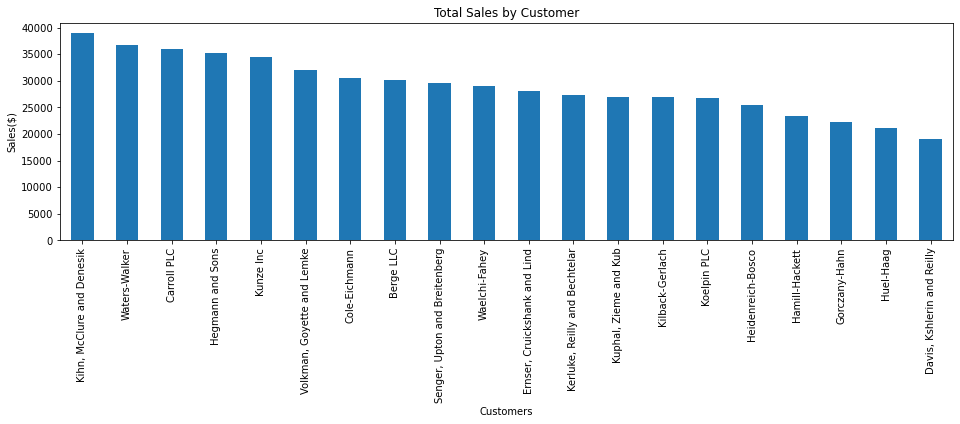

In [19]:
# Practice：Bar修改

import matplotlib.pyplot as plt

sales_totals = sales[['name',
                      'ext price',
                      'date']].groupby('name').sum().sort_values(by = 'ext price', ascending = False)

my_plot = sales_totals.plot(kind = 'bar', 
                            figsize = (16, 4), 
                            legend = None,
                            title = 'Total Sales by Customer')

my_plot.set_xlabel('Customers')
my_plot.set_ylabel('Sales($)')
plt.show()

#### 堆疊長條圖

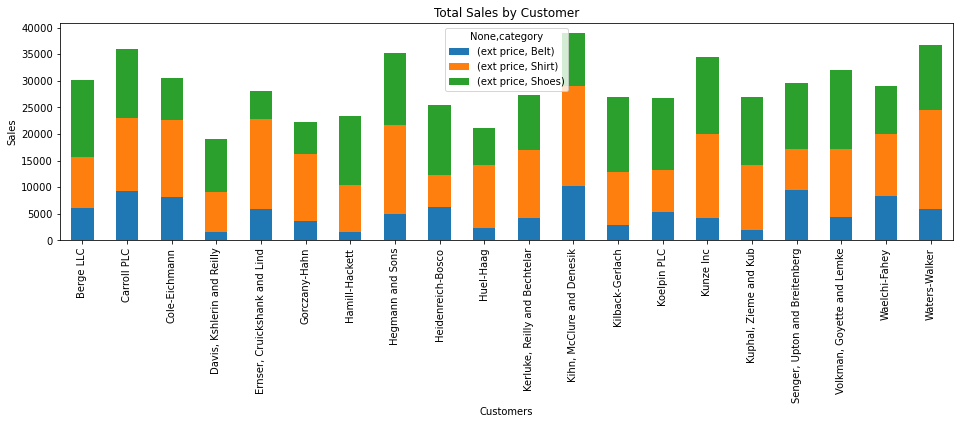

In [20]:
# Practice：堆疊長條圖

import matplotlib.pyplot as plt

data = sales[['name', 'category', 'ext price', 'date']].groupby(['name', 'category']).sum().unstack()

my_plot = data.plot(kind = 'bar', stacked = True, title = 'Total Sales by Customer', figsize = (16, 4))
my_plot.set_xlabel('Customers')
my_plot.set_ylabel('Sales')
plt.show( )

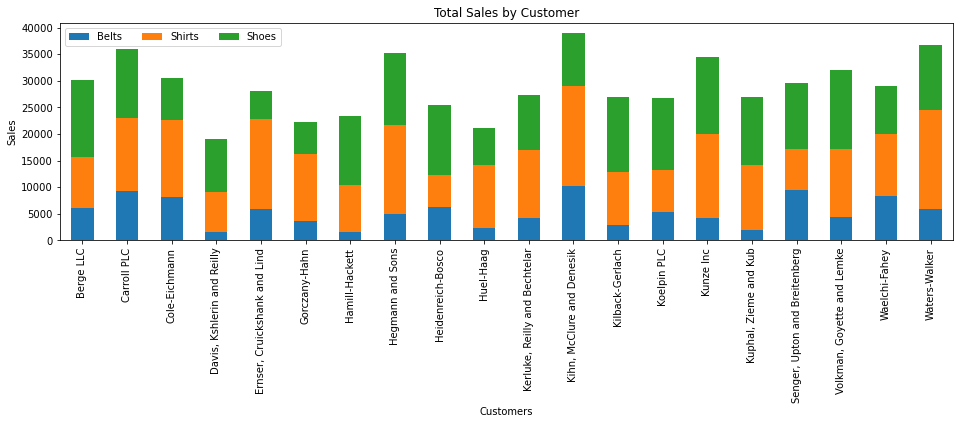

In [21]:
# Practice：堆疊長條圖調整

import matplotlib.pyplot as plt

data = sales[['name', 'category', 'ext price', 'date']].groupby(['name', 'category']).sum().unstack()

my_plot = data.plot(kind = 'bar', stacked = True, title = 'Total Sales by Customer', figsize = (16, 4))
my_plot.set_xlabel('Customers')
my_plot.set_ylabel('Sales')
my_plot.legend(['Belts','Shirts','Shoes'], loc = 0, ncol = 3)
plt.show( )

#### 設計直方圖

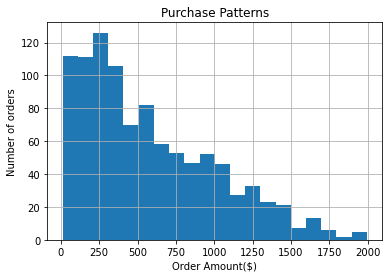

In [23]:
# Practice：設計直方圖

import matplotlib.pyplot as plt

purchase_plot = sales[['ext price', 'date']]['ext price'].hist(bins = 20)
purchase_plot.set_title('Purchase Patterns')
purchase_plot.set_xlabel('Order Amount($)')
purchase_plot.set_ylabel('Number of orders')
plt.show( )

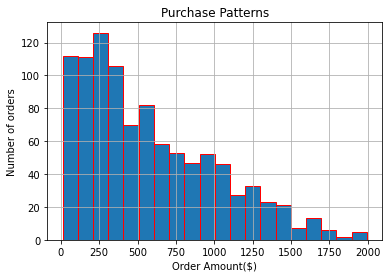

In [24]:
# 加入邊框顏色

import matplotlib.pyplot as plt

purchase_plot = sales[['ext price', 'date']]['ext price'].hist(bins = 20, edgecolor = 'red')
purchase_plot.set_title('Purchase Patterns')
purchase_plot.set_xlabel('Order Amount($)')
purchase_plot.set_ylabel('Number of orders')
plt.show( )

#### 日期重新採樣

In [26]:
# Practice：日期重新採樣

import matplotlib.pyplot as plt

sales['date'] = pd.to_datetime(sales['date'])
purchase_patterns = sales[['ext price', 'date']].set_index('date').resample('M').sum()
purchase_patterns

,ext price
date,
2013-10-31,14085.27
2013-11-30,44932.78
2013-12-31,57752.23
2014-01-31,53161.35
2014-02-28,51783.56
2014-03-31,44991.85
2014-04-30,34098.05
2014-05-31,50001.02
2014-06-30,37477.65


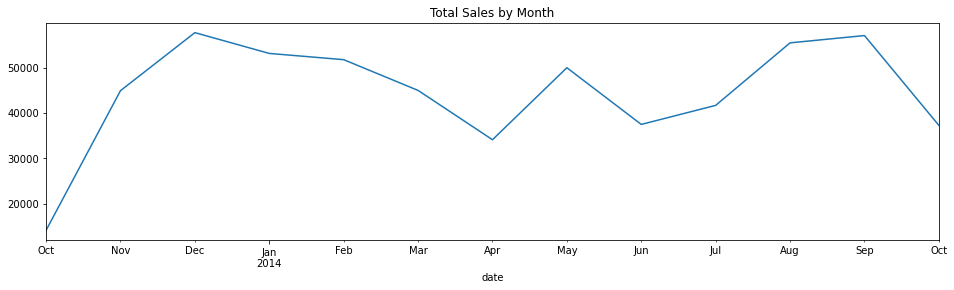

In [29]:
# 圖表顯示並儲存檔案

import matplotlib.pyplot as plt

sales['date'] = pd.to_datetime(sales['date'])
purchase_patterns = sales[['ext price', 'date']].set_index('date').resample('M').sum()
purchase_patterns.plot(title = 'Total Sales by Month', legend = None, figsize = (16, 4))
plt.savefig('total-sales.png')